In [13]:
import os
import sys
from os.path import join, dirname
from os import getcwd
from typing import Tuple, List

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
sys.path.append('../utils')

from fasthit.landscapes import NK, GB1
from fasthit import Landscape
from plots import RS

# Landscape statistics

fitness distribution

In [16]:
lnd_names = ['Standard_NK', 'Exp_NK', 'Exp_NK_zipf', 'Exp_NK_zipf_hole']
N, K = 4, 1
landscapes = []
landscapes.append(NK(N, K))
landscapes.append(NK(N, K, epi='exp'))
landscapes.append(NK(N, K, epi='exp', pos_weight='zipf'))
landscapes.append(NK(N, K, epi='exp', pos_weight='zipf', cut_off=0.3))
#
data_all = []
data = []
for i, landscape in enumerate(landscapes):
    data_all.append(np.array(list(landscape._sequences.values())))
    data.append(data_all[i][data_all[i]>0.])
    print(lnd_names[i], len(data[i])/len(data_all[i]))

Standard_NK 0.99999375
Exp_NK 0.99999375
Exp_NK_zipf 0.99999375
Exp_NK_zipf_hole 0.0712375


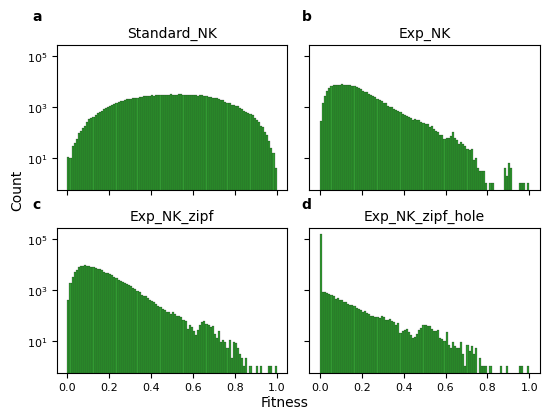

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(5.5,4), dpi=100, sharex=True, sharey=True)
scales = [(False, True)] * 4
for i, ax in enumerate(axes.reshape(-1)):
    sns.histplot(ax=ax, x=data_all[i], binwidth=0.01, log_scale=scales[i], color='green', alpha=0.8)
    ax.set_title(lnd_names[i], fontsize=10)
    ax.tick_params(labelsize=8)
    ax.set_ylabel('')
fig.text(0.04, 1.00, 'a', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.53, 1.00, 'b', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.04, 0.53, 'c', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.53, 0.53, 'd', ha='left', va='top', rotation='horizontal', fontsize=10, fontweight='bold')
fig.text(0.0, 0.55, 'Count', ha='left', va='center', rotation='vertical', fontsize=10)
fig.text(0.50, 0.0, 'Fitness', ha='center', va='bottom', rotation='horizontal', fontsize=10)
###
fig.tight_layout(pad=1.2, h_pad=1, w_pad=1)
###
plt.show()

Ruggedness

In [18]:
lnd_names = ['GB1', 'Standard_NK', 'Exp_NK', 'Exp_NK_zipf', 'Exp_NK_zipf_hole']
NK_select = [[4, 0], [4, 1]]

gb1_prefix = f'../data/gb1/landscapes'
nk_prefix = f'../data/nk/landscapes'

landscapes: List[Landscape] = []
files: List[str] = []

datas: Tuple[pd.DataFrame, pd.DataFrame] = []
for N, K in NK_select:
    landscapes = []
    files = []
    for seed in [1, 12, 123, 1234, 12345]:
        landscapes.append(GB1('with_imputed', 'V39,D40,G41,V54'))
        files.append(join(gb1_prefix, 'gb1.csv'))
        landscapes.append(NK(N, K, seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_{seed}.csv'))
        landscapes.append(NK(N, K, epi='exp', seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_exp_{seed}.csv'))
        landscapes.append(NK(N, K, epi='exp', pos_weight='zipf', seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_exp_zipf_{seed}.csv'))
        landscapes.append(NK(N, K, epi='exp', pos_weight='zipf', cut_off=0.3, seed=seed))
        files.append(join(nk_prefix, f'N{N}K{K}_exp_zipf_hole_{seed}.csv'))
    rs_landscape = RS(landscapes, files).reshape(-1, 5)
    rs = pd.DataFrame(rs_landscape, columns=lnd_names)
    datas.append(rs)
rs0, rs1 = datas

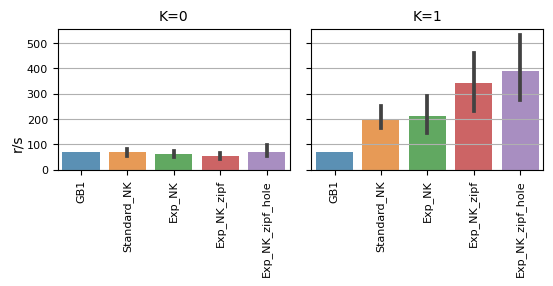

In [19]:
xlabels = lnd_names
titles = ['K=0', 'K=1']
fig, axes = plt.subplots(1, 2, figsize=(5.5,3), dpi=100, sharey=True)
for ax, rs, title in zip(axes, (rs0, rs1), titles):
    sns.barplot(ax=ax,data=rs, alpha=0.8)
    ax.set_title(title, fontsize=10)
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels, fontsize=8, rotation=90)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='y', which='major')
###
fig.text(0.0, 0.5, 'r/s', va='center', rotation='vertical', fontsize=10)
###
fig.tight_layout(pad=1.2, h_pad=1)
###
plt.show()

Ruggedness and size of sequence space

In [20]:
nk_prefix = f'../data/nk/landscapes'

NK_select = [[4, 0], [4, 1], [5, 1], [6, 1], [4, 2], [4, 3]]

lnd_names = [f'N{N}K{K}_exp_zipf_hole' for N, K in NK_select]

landscapes = [NK(N, K, epi='exp', pos_weight='zipf', cut_off=0.3) for N, K in NK_select]
files = [join(nk_prefix, f'{file}.csv') for file in lnd_names]

In [21]:
rs = RS(landscapes, files)
print(rs)

[  62.23357315  258.68667922  203.25929845  503.11078806 1044.28138443
 4826.29814297]


In [22]:
ps = np.concatenate([rs[:2], rs[-2:]])
ps

array([  62.23357315,  258.68667922, 1044.28138443, 4826.29814297])

In [23]:
qs = rs[1:4]
qs

array([258.68667922, 203.25929845, 503.11078806])

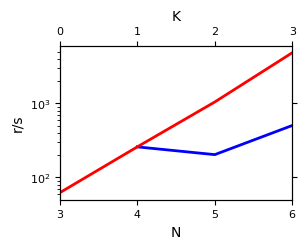

In [24]:
fig, ax1 = plt.subplots(figsize=(3,2), dpi=100)
ax1.plot(range(4, len(qs) + 4), qs, color='blue', linewidth=2.)
ax1.tick_params(labelsize=8, right=True)
ax1.set_xticks(range(3, len(qs) + 4))
ax1.set_xticklabels([3, 4, 5, 6])
ax1.set_ylabel("r/s", fontsize=10)
ax1.set_xlabel("N", fontsize=10)
ax1.set_xlim(3, 6)
ax1.semilogy()
###
ax2 = ax1.twiny()
ax2.plot(ps, color='red', linewidth=2.)
ax2.tick_params(labelsize=8)
ax2.set_xticks(range(len(ps)))
ax2.set_xticklabels([0, 1, 2, 3])
ax2.set_xlim(0, 3)
ax2.set_xlabel("K", fontsize=10)
###
plt.show()